In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import seaborn as sns

MBs of Data written vs time. 

      time_seconds  total_writes
0                0        117.00
1                1        130.50
2                2        151.00
3                3        140.50
4                4        139.00
...            ...           ...
2050          3419          7.75
2051          3421          7.75
2052          3423          7.75
2053          3425          1.25
2054          3427          7.50

[2055 rows x 2 columns]


/home/puneet/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/puneet/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


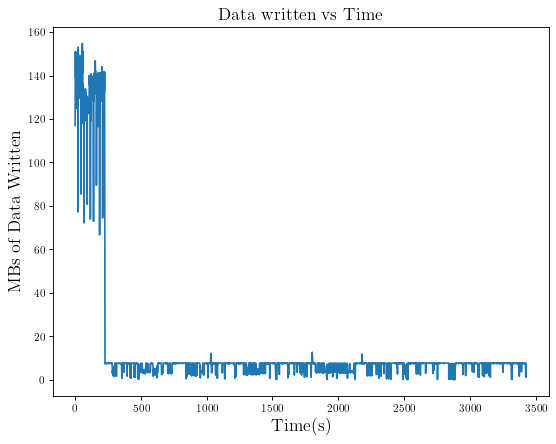

In [26]:
df = pd.read_csv('lat_log_avg_lat.1.log', sep=',', names=['time_msec', 'latency', 'op2', 'write_size', 'op3'])

# Convert 'time_msec' to seconds
df['time_seconds'] = df['time_msec'] / 1000  # Convert milliseconds to seconds

# Round down the time_seconds to the nearest second
df['time_seconds'] = df['time_seconds'].astype(int)

# Create a new dataframe with the count of writes per second
new_df = df.groupby('time_seconds')['write_size'].sum().reset_index()

# Rename columns for clarity
new_df.columns = ['time_seconds', 'total_writes']
new_df['total_writes'] = new_df['total_writes'] / 1024**2  # Convert bytes to MB

# Display the new dataframe
print(new_df)

# Plot the data
# Create the line plot
plt.figure(figsize=(8, 6), dpi=80)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

sns.lineplot(data=new_df, x='time_seconds', y='total_writes', linestyle='-')

# Add labels and title
plt.xlabel('Time(s)', fontsize=16)

plt.ylabel('MBs of Data Written', fontsize=16)
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.title('Data written vs Time', fontsize=16)

# Show the plot
# plt.grid(True)  # Optionally, add grid lines
# plt.legend(loc='upper right', fontsize=14)
plt.savefig('mb_vs_time.pdf', bbox_inches='tight')
plt.show()


CDF plot


      time_seconds  total_writes  cumulative_gb  normalized_data
0                0        117.00         117.00         0.002856
1                1        130.50         247.50         0.006042
2                2        151.00         398.50         0.009729
3                3        140.50         539.00         0.013159
4                4        139.00         678.00         0.016553
...            ...           ...            ...              ...
2050          3419          7.75       40935.75         0.999408
2051          3421          7.75       40943.50         0.999597
2052          3423          7.75       40951.25         0.999786
2053          3425          1.25       40952.50         0.999817
2054          3427          7.50       40960.00         1.000000

[2055 rows x 4 columns]


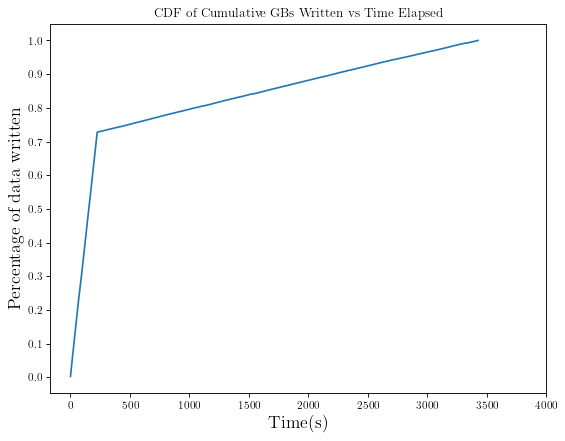

In [39]:
df = pd.read_csv('lat_log_avg_lat.1.log', sep=',', names=['time_msec', 'latency', 'op2', 'write_size', 'op3'])

# Convert 'time_msec' to seconds
df['time_seconds'] = df['time_msec'] / 1000  # Convert milliseconds to seconds

# Round down the time_seconds to the nearest second
df['time_seconds'] = df['time_seconds'].astype(int)

# Create a new dataframe with the count of writes per second
new_df = df.groupby('time_seconds')['write_size'].sum().reset_index()

# Rename columns for clarity
new_df.columns = ['time_seconds', 'total_writes']
new_df['total_writes'] = new_df['total_writes'] / 1024**2  # Convert bytes to MB
new_df['cumulative_gb'] = new_df['total_writes'].cumsum()  # Convert MB to GB

# Display the new dataframe


new_df['normalized_data'] = new_df['cumulative_gb']/ new_df['cumulative_gb'].iloc[-1] # Normalize the data
print(new_df)

plt.figure(figsize=(8, 6), dpi=80)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# Plot the data
plt.plot(new_df['time_seconds'], new_df['normalized_data'], linestyle='-', label = 'CDF of Data Written')
plt.xlabel('Time(s)', fontsize=16)
plt.ylabel('Percentage of data written', fontsize=16)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(0, 4500, 500))
plt.title('CDF of Cumulative GBs Written vs Time Elapsed')

plt.savefig('cdf_gb_vs_time.pdf', bbox_inches='tight')
plt.show()

## CDF: 
### write_cdf/lsdm_lat_log_avg_lat.1.log vs write_cdf/STL_lat_log_avg_lat.1.log CDF


     time_seconds  total_writes  cumulative_gb  normalized_data
0               0          53.0           53.0         0.001294
1               1          63.0          116.0         0.002832
2               2          97.0          213.0         0.005200
3               3         109.0          322.0         0.007861
4               4          94.0          416.0         0.010156
..            ...           ...            ...              ...
490           490          76.0        40599.0         0.991187
491           491          84.0        40683.0         0.993237
492           492          92.0        40775.0         0.995483
493           493          80.0        40855.0         0.997437
494           494         105.0        40960.0         1.000000

[495 rows x 4 columns]
     time_seconds  total_writes  cumulative_gb  normalized_data
0               0         167.0          167.0         0.004077
1               1         191.0          358.0         0.008740
2               

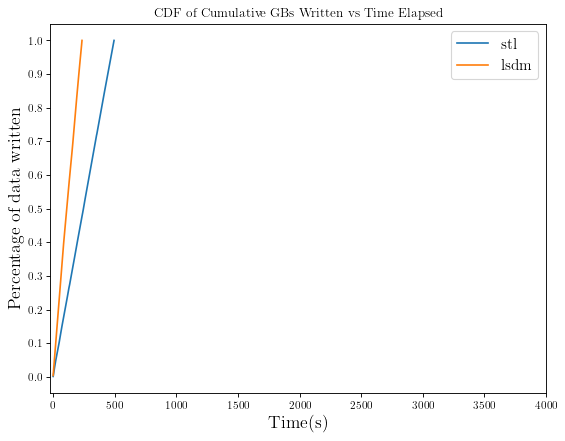

In [4]:
df_stl = pd.read_csv('write_cdf/STL_lat_log_avg_lat.1.log', sep=',', names=['time_msec', 'latency', 'op2', 'write_size', 'op3'])

# Convert 'time_msec' to seconds
df_stl['time_seconds'] = df_stl['time_msec'] / 1000  # Convert milliseconds to seconds

# Round down the time_seconds to the nearest second
df_stl['time_seconds'] = df_stl['time_seconds'].astype(int)

# Create a new dataframe with the count of writes per second
stl_new_df = df_stl.groupby('time_seconds')['write_size'].sum().reset_index()

# Rename columns for clarity
stl_new_df.columns = ['time_seconds', 'total_writes']
stl_new_df['total_writes'] = stl_new_df['total_writes'] / 1024**2  # Convert bytes to MB
stl_new_df['cumulative_gb'] = stl_new_df['total_writes'].cumsum()  # Convert MB to GB

# Display the new dataframe
stl_new_df['normalized_data'] = stl_new_df['cumulative_gb']/ stl_new_df['cumulative_gb'].iloc[-1] # Normalize the data
print(stl_new_df)


df_lsdm = pd.read_csv('write_cdf/lsdm_lat_log_avg_lat.1.log', sep=',', names=['time_msec', 'latency', 'op2', 'write_size', 'op3'])
# Convert 'time_msec' to seconds
df_lsdm['time_seconds'] = df_lsdm['time_msec'] / 1000  # Convert milliseconds to seconds

# Round down the time_seconds to the nearest second
df_lsdm['time_seconds'] = df_lsdm['time_seconds'].astype(int)

# Create a new dataframe with the count of writes per second
lsdm_new_df = df_lsdm.groupby('time_seconds')['write_size'].sum().reset_index()

# Rename columns for clarity
lsdm_new_df.columns = ['time_seconds', 'total_writes']
lsdm_new_df['total_writes'] = lsdm_new_df['total_writes'] / 1024**2  # Convert bytes to MB
lsdm_new_df['cumulative_gb'] = lsdm_new_df['total_writes'].cumsum()  # Convert MB to GB

# Display the new dataframe
lsdm_new_df['normalized_data'] = lsdm_new_df['cumulative_gb']/ lsdm_new_df['cumulative_gb'].iloc[-1] # Normalize the data
print(lsdm_new_df)

plt.figure(figsize=(8, 6), dpi=80)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# Plot the data
plt.plot(stl_new_df['time_seconds'], stl_new_df['normalized_data'], linestyle='-', label = 'stl')
plt.plot(lsdm_new_df['time_seconds'], lsdm_new_df['normalized_data'], linestyle='-', label = 'lsdm')
plt.xlabel('Time(s)', fontsize=16)
plt.ylabel('Percentage of data written', fontsize=16)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(0, 4500, 500))
plt.title('CDF of Cumulative GBs Written vs Time Elapsed')

plt.savefig('cdf_gb_vs_time.pdf', bbox_inches='tight')
plt.legend(loc='upper right', fontsize=14)
plt.show()

### GBs of data written vs time elapsed

In [ ]:
df_lsdm = pd.read_csv('write_cdf/lsdm_lat_log_avg_lat.1.log', sep=',', names=['time_msec', 'latency', 'op2', 'write_size', 'op3'])

# Convert 'time_msec' to seconds
df['time_seconds'] = df['time_msec'] / 1000  # Convert milliseconds to seconds

# Round down the time_seconds to the nearest second
df['time_seconds'] = df['time_seconds'].astype(int)

# Create a new dataframe with the count of writes per second
new_df = df.groupby('time_seconds')['write_size'].sum().reset_index()

# Rename columns for clarity
new_df.columns = ['time_seconds', 'total_writes']
new_df['total_writes'] = new_df['total_writes'] / 1024**2  # Convert bytes to MB

# Display the new dataframe
print(new_df)

# Plot the data
# Create the line plot
plt.figure(figsize=(8, 6), dpi=80)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

sns.lineplot(data=new_df, x='time_seconds', y='total_writes', linestyle='-')

# Add labels and title
plt.xlabel('Time(s)', fontsize=16)

plt.ylabel('MBs of Data Written', fontsize=16)
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.title('Data written vs Time', fontsize=16)

# Show the plot
# plt.grid(True)  # Optionally, add grid lines
# plt.legend(loc='upper right', fontsize=14)
plt.savefig('mb_vs_time.pdf', bbox_inches='tight')
plt.show()


8160 zones prepopulated
     time_seconds  total_writes
0               0        190.00
1               1        172.75
2               2        181.75
3               3        183.75
4               4         71.50
..            ...           ...
417         30620         65.25
418         30974         51.25
419         30975         75.00
420         30976         72.50
421         30977         73.00

[422 rows x 2 columns]
8140 zones prepopulated
     time_seconds  total_writes
0               0        186.25
1               1        177.75
2               2        179.25
3               3        183.75
4               4        179.00
..            ...           ...
421          1050        113.25
422          1051        142.75
423          1207         61.50
424          1208        160.00
425          1209         50.25

[426 rows x 2 columns]
total writes for 8160 zones prepopulated 30720.0
total writes for 8140 zones prepopulated 30720.0


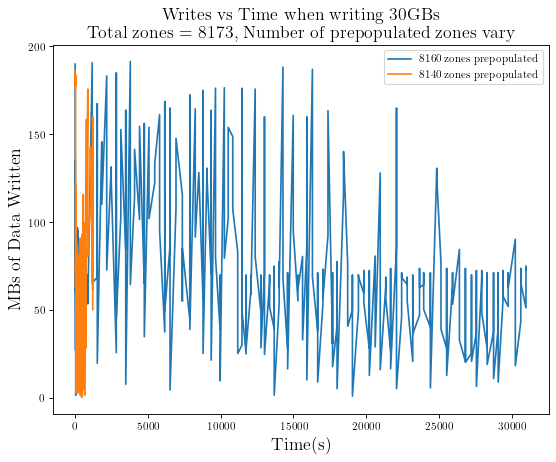

In [15]:
df = pd.read_csv('newer/async/bs256K/2080_40G/90_10_zipv/8160Populated/round1/lat_log_avg_lat.1.log', sep=',', names=['time_msec', 'latency', 'op2', 'write_size', 'op3'])

# Convert 'time_msec' to seconds
df['time_seconds'] = df['time_msec'] / 1000 # Convert nanoseconds to milliseconds

# Round down the time_seconds to the nearest second
df['time_seconds'] = df['time_seconds'].astype(int)

# Create a new dataframe with the count of writes per second
new_df = df.groupby('time_seconds')['write_size'].sum().reset_index()

# Rename columns for clarity
new_df.columns = ['time_seconds', 'total_writes']
new_df['total_writes'] = new_df['total_writes'] / 1024**2  # Convert bytes to MB

# Display the new dataframe
print("8160 zones prepopulated")
print(new_df)
############################################################
df1 = pd.read_csv('newer/async/bs256K/2080_40G/90_10_zipv/8140Populated/lat_log_avg_lat.1.log', sep=',', names=['time_msec', 'latency', 'op2', 'write_size', 'op3'])

# Convert 'time_msec' to seconds
df1['time_seconds'] = df1['time_msec'] / 1000  # Convert milliseconds to seconds

# Round down the time_seconds to the nearest second
df1['time_seconds'] = df1['time_seconds'].astype(int)

# Create a new dataframe with the count of writes per second
new_df1 = df1.groupby('time_seconds')['write_size'].sum().reset_index()

# Rename columns for clarity
new_df1.columns = ['time_seconds', 'total_writes']
new_df1['total_writes'] = new_df1['total_writes'] / 1024**2  # Convert bytes to MB

# Display the new dataframe
print("8140 zones prepopulated")
print(new_df1)
print ("total writes for 8160 zones prepopulated", new_df['total_writes'].sum())  
print ("total writes for 8140 zones prepopulated", new_df1['total_writes'].sum())
###################################################################
# Plot the data
# Create the line plot
plt.figure(figsize=(8, 6), dpi=80)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

sns.lineplot(data=new_df, x='time_seconds', y='total_writes', linestyle='-', label = '8160 zones prepopulated')
sns.lineplot(data=new_df1, x='time_seconds', y='total_writes', linestyle='-', label = '8140 zones prepopulated')

# Add labels and title
plt.xlabel('Time(s)', fontsize=16)

plt.ylabel('MBs of Data Written', fontsize=16)
plt.yticks(np.arange(0, 250, 50))
plt.title('Writes vs Time when writing 30GBs\nTotal zones = 8173, Number of prepopulated zones vary ', fontsize=16)

# Show the plot
# plt.grid(True)  # Optionally, add grid lines
# plt.legend(loc='upper right', fontsize=14)
plt.savefig('mb_vs_time.pdf', bbox_inches='tight')
plt.show()
